In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from glob import iglob

In [11]:
# Load all structural p-values across both analyses
df = pd.read_csv("clinvar/pathogenic_K_summary.txt",delimiter='\t')

In [12]:
print "Number of structures evaluated:"
print len(df)
print "\nProportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(df[df["Kp"]<0.01]),len(df[df["Kp"]<0.01]) / float(len(df)))
print "Perm Z-Score: (%4d) %.4f"%(len(df[df["Kzp"]<0.01]),len(df[df["Kzp"]<0.01]) / float(len(df)))
print '\nNumber with nominally significant weighted p-values:'
print "Permutation:  (%4d) %.4f"%(len(df[df["wKp"]<0.01]),len(df[df["wKp"]<0.01]) / float(len(df)))
print "Perm Z-Score: (%4d) %.4f"%(len(df[df["wKzp"]<0.01]),len(df[df["wKzp"]<0.01]) / float(len(df)))

Number of structures evaluated:
456

Proportion with nominally significant unweighted p-values:
Permutation:  ( 117) 0.2566
Perm Z-Score: ( 137) 0.3004

Number with nominally significant weighted p-values:
Permutation:  (   0) 0.0000
Perm Z-Score: (   0) 0.0000


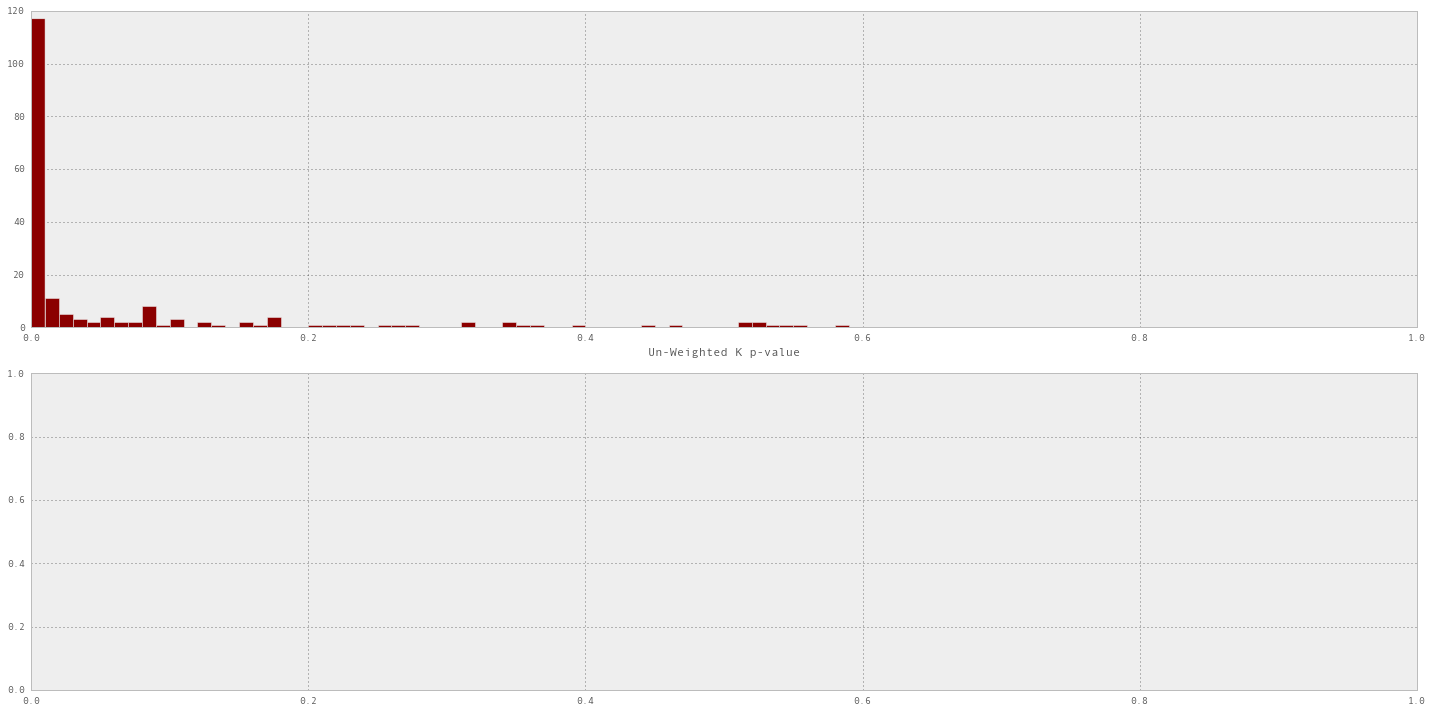

In [13]:
# P-Value Distributions
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].set_xlabel("Un-Weighted K p-value")
# Removing the artifacts where the lowest variance K was chosen
ax[0].hist(df[~((df["T"]==5) & (df["K"]==0))]["Kp"],bins=np.arange(0,1,0.01),color="darkred")
# ax[1].set_xlabel("Weighted K p-value")
# ax[1].hist(df["wKp"],bins=np.arange(0,1,0.01),color="darkred")
plt.tight_layout()
plt.show()

In [34]:
bonferroni = 0.01 / len(df)

In [35]:
print "Bonferonni-corrected p<0.01: %4d"%len(df[df["Kp"]<bonferroni])

Bonferonni-corrected p<0.01:   14


In [36]:
print "Proteins passing un-weighted Bonferroni correction at p<0.01:"
df[df["Kp"]<bonferroni].sort_values(by="Kzp")

Proteins passing un-weighted Bonferroni correction at p<0.01:


,structid,chain,R,N,P,T,K,Kp,Kz,Kzp,wP,wT,wK,wKp,wKz,wKzp
162,2SHP,B,491,44,100000,21,0.5529,0.00001,12.750,2.953000e-37,NaN,NaN,NaN,NaN,NaN,NaN
409,4B7L,A,328,13,100000,21,0.9615,0.00001,10.880,1.402000e-27,NaN,NaN,NaN,NaN,NaN,NaN
150,3II5,A,262,30,100000,16,0.5218,0.00001,10.600,3.061000e-26,NaN,NaN,NaN,NaN,NaN,NaN
445,1IIL,G,215,16,100000,26,0.8750,0.00001,8.611,7.224000e-18,NaN,NaN,NaN,NaN,NaN,NaN
342,3BG3,A,679,10,100000,20,0.6889,0.00001,8.107,5.209000e-16,NaN,NaN,NaN,NaN,NaN,NaN
310,1NR1,C,496,9,100000,21,0.9444,0.00001,8.015,1.104000e-15,NaN,NaN,NaN,NaN,NaN,NaN
274,2Y1M,F,384,9,100000,18,0.7778,0.00001,7.650,2.012000e-14,NaN,NaN,NaN,NaN,NaN,NaN
230,1C9Y,A,321,131,100000,26,0.6936,0.00001,7.523,5.365000e-14,NaN,NaN,NaN,NaN,NaN,NaN
151,1D5R,A,307,41,100000,22,0.6037,0.00001,7.434,1.057000e-13,NaN,NaN,NaN,NaN,NaN,NaN
157,3LCO,A,293,31,100000,20,0.5914,0.00001,6.562,5.326000e-11,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
tdf = df[df["Kp"]<.01]
print "%.2f%%"%(100.*len(tdf)/len(df))
print ''
print np.mean(tdf["T"])
print np.std(tdf["T"])
print ''
tdf = df[df["wKp"]<.01]
print "%.2f%%"%(100.*len(tdf)/len(df))
print ''
print np.mean(tdf["wT"])
print np.std(tdf["wT"])

25.66%

19.7777777778
12.8542859999

0.00%

nan
nan


In [38]:
from statsmodels.sandbox.stats.multicomp import multipletests as fdr
_,adjp,_,_ = fdr(df["Kp"].values,0.01,'fdr_bh')
print "Unweighted: %4d"%(adjp<0.01).sum()

Unweighted:   51


/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


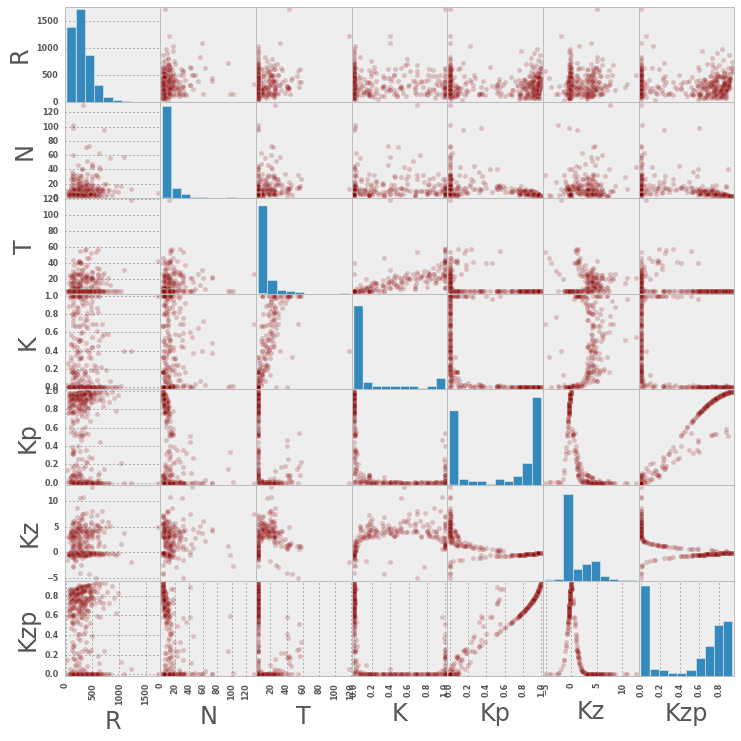

In [19]:
# Correlation matrix of column values
font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
tdf = df.dropna(how='all',axis=1).drop("P",axis=1)
axes = pd.tools.plotting.scatter_matrix(tdf,alpha=0.2,figsize=(12,12),c="darkred",grid="Off",s=100)
plt.show()

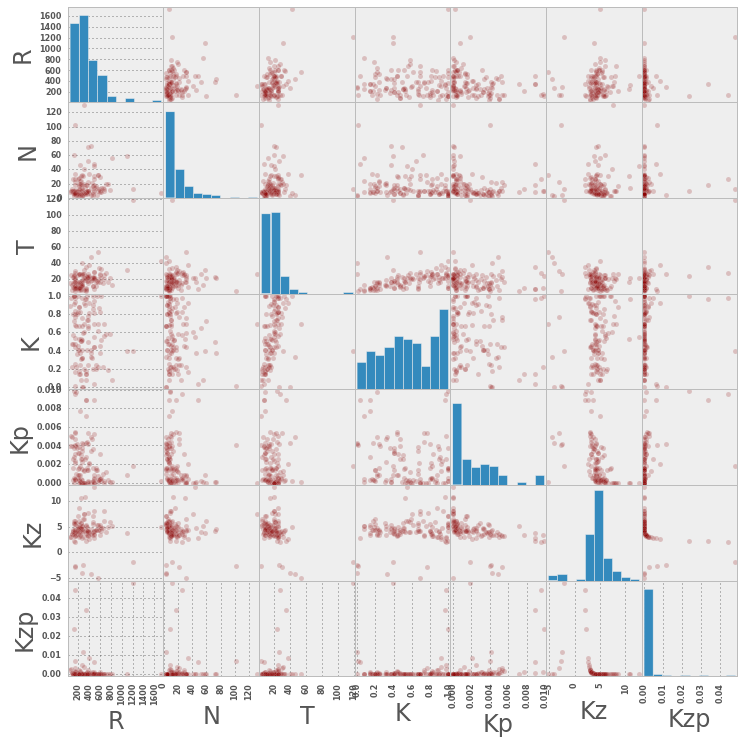

In [41]:
# Correlation matrix of column values for significant proteins
font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
tdf = df[df["Kp"]<0.01].dropna(how='all',axis=1).drop("P",axis=1)
axes = pd.tools.plotting.scatter_matrix(tdf,alpha=0.2,figsize=(12,12),c="darkred",grid="Off",s=100)
plt.show()

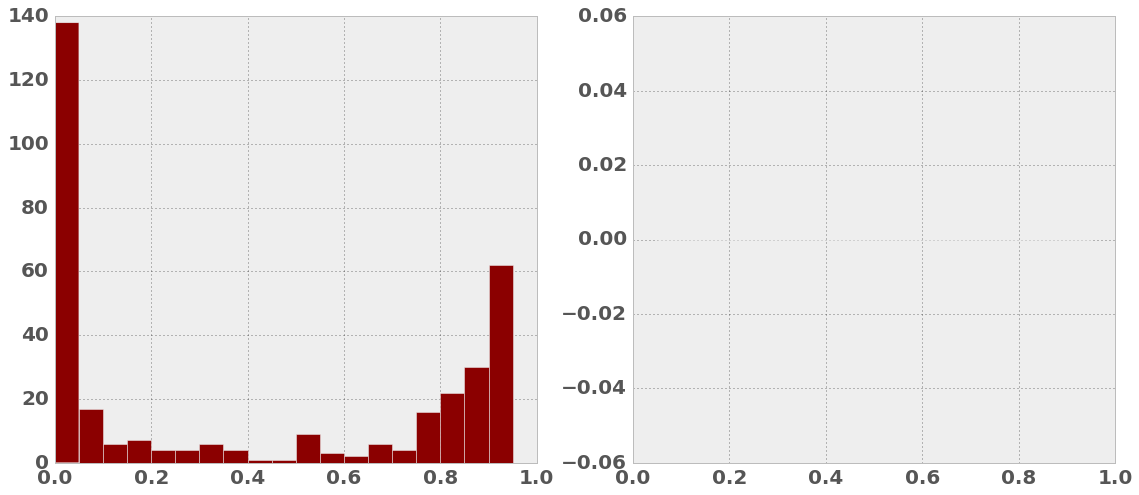

In [21]:
fig,ax = plt.subplots(1,2,figsize=(19,8))
ax[0].hist(df["Kp"].values,bins=np.arange(0,1,0.05),color="darkred")
ax[1].hist(df["wKp"].values,bins=np.arange(0,1,0.05),color="darkred")
plt.show()

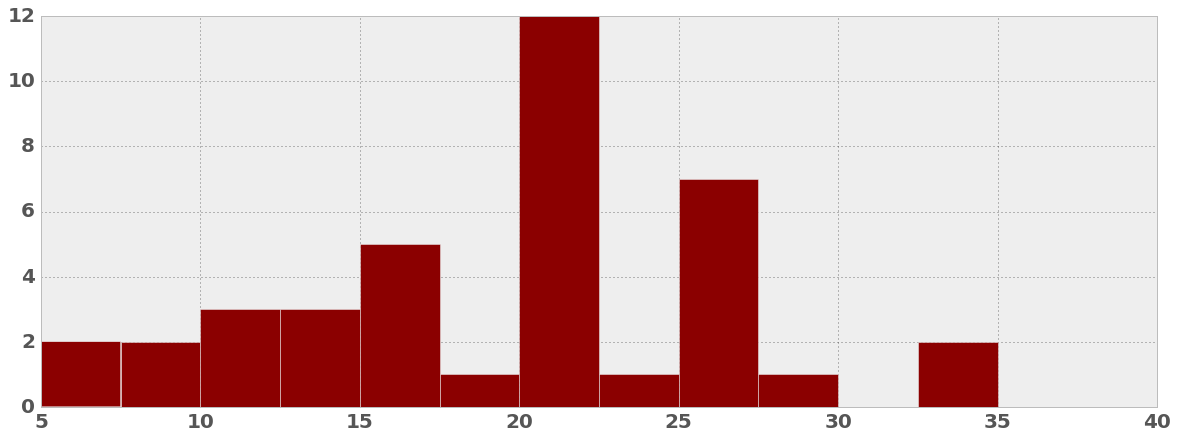

In [22]:
plt.figure(figsize=(20,7))
plt.hist(tdf["T"].values,bins=np.arange(5,40,2.5),color="darkred")
plt.show()

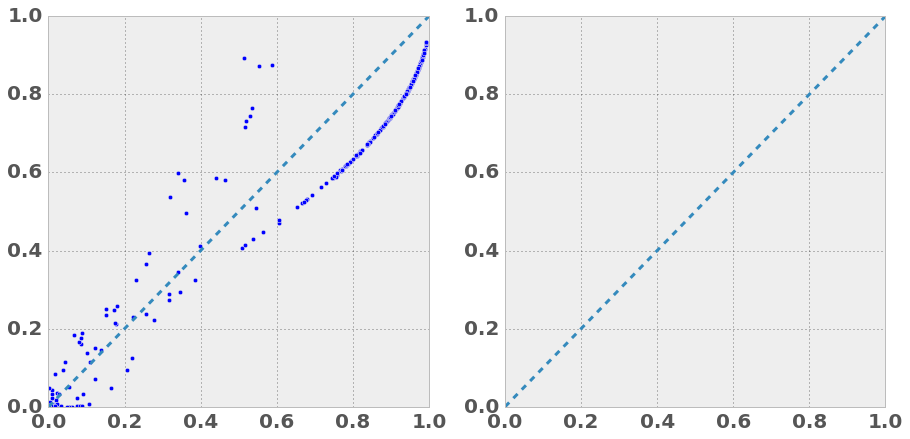

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(df["Kp"].values,df["Kzp"].values)
ax[1].scatter(df["wKp"].values,df["wKzp"].values)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])
ax[0].plot([0,1],[0,1],ls="dashed",lw=3)
ax[1].plot([0,1],[0,1],ls="dashed",lw=3)
plt.show()

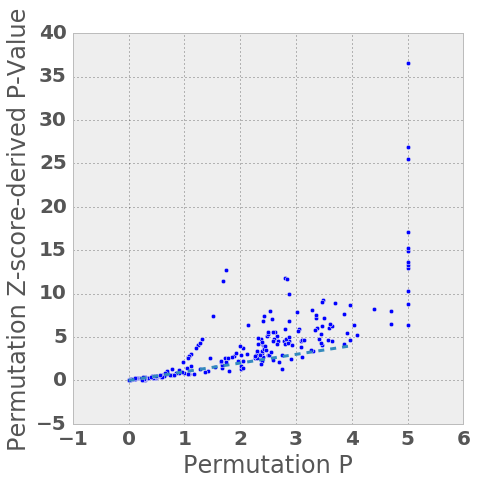

In [24]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(-np.log10(df["Kp"].values),-np.log10(df["Kzp"].values))
ax.plot([0,4],[0,4],ls="dashed",lw=3)
ax.set_xlabel("Permutation P")
ax.set_ylabel("Permutation Z-score-derived P-Value")
plt.show()

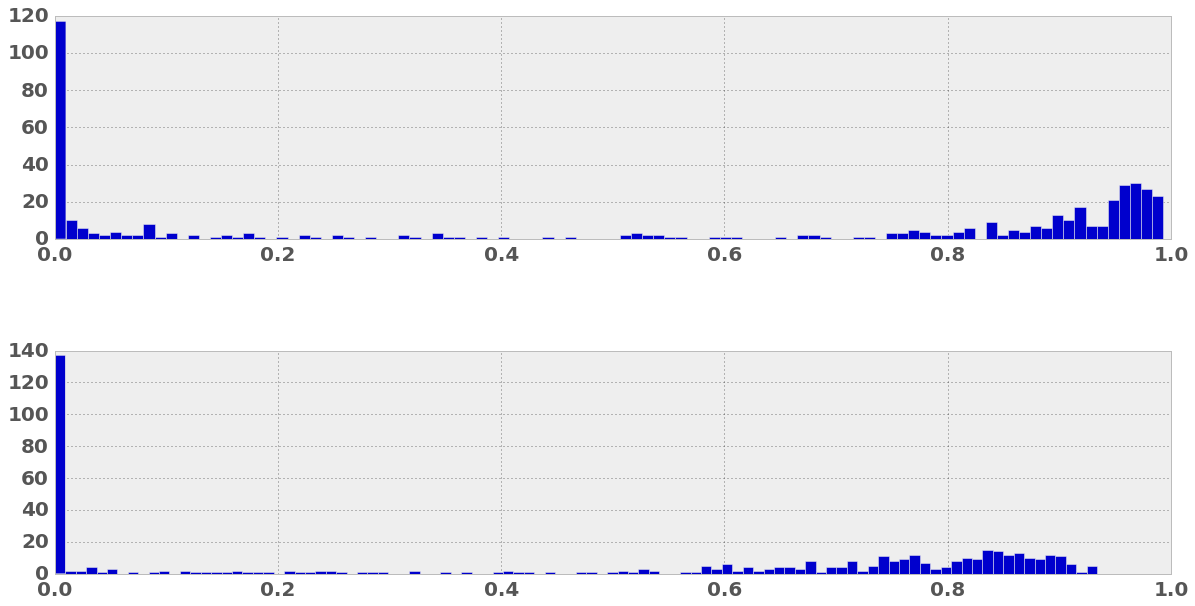

In [25]:
# Permutation p-value distributions
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].hist(df["Kp"],bins=100, color="mediumblue")
ax[1].hist(df["Kzp"],bins=100,color="mediumblue")
plt.show()

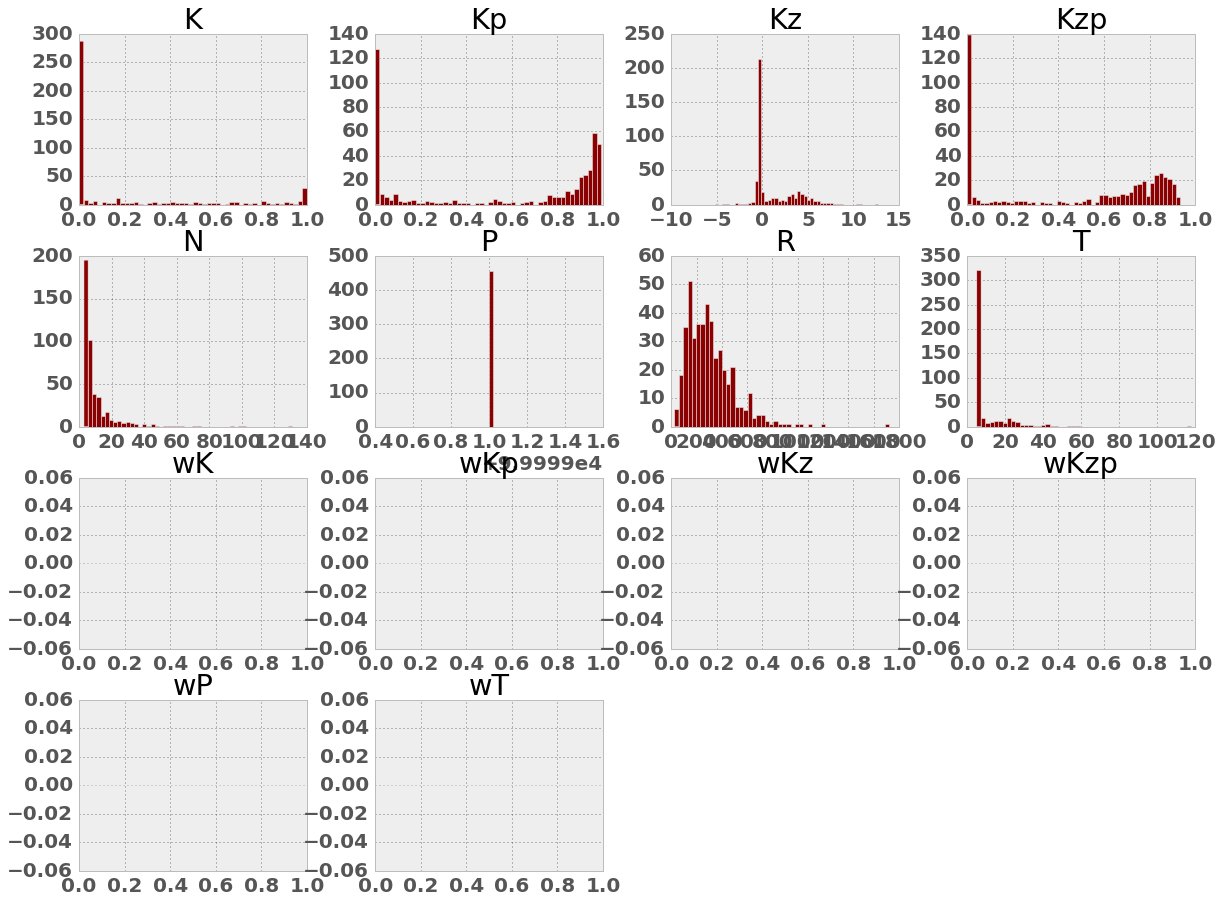

In [26]:
# All
df.hist(bins=50,figsize=(20,15),color="darkred")
plt.show()

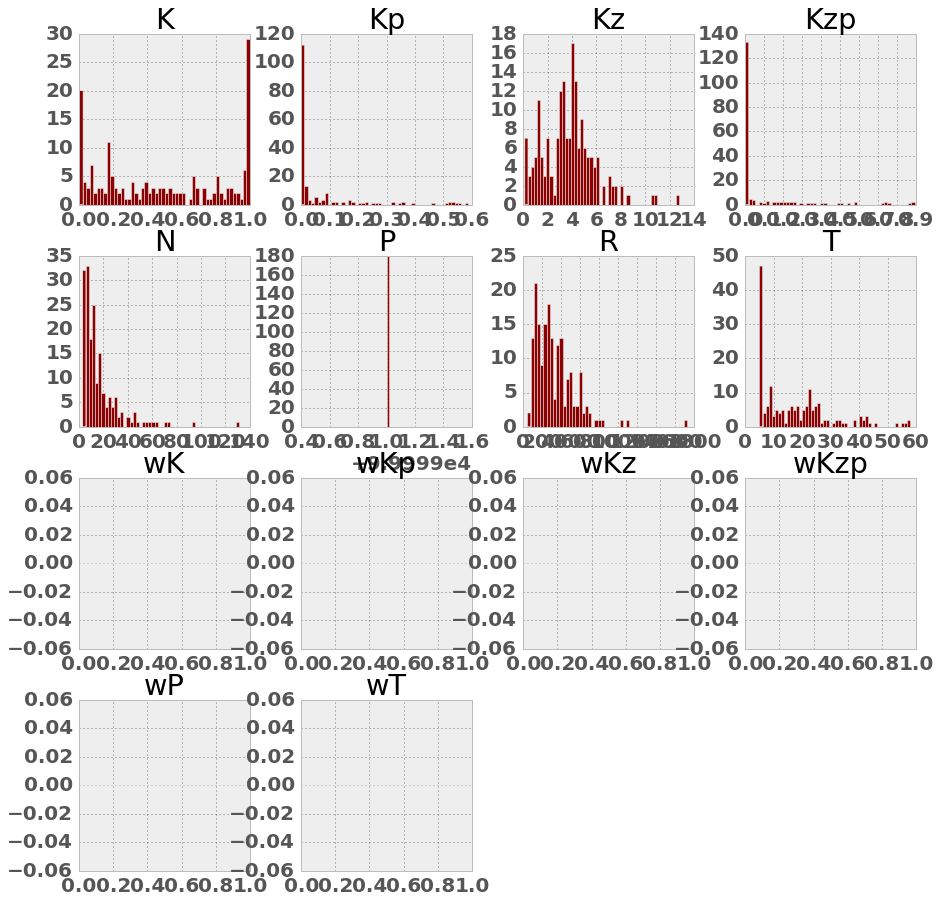

In [27]:
# Clustered
df[df["Kz"]>0].hist(bins=50,figsize=(15,15),color="darkred")
plt.show()

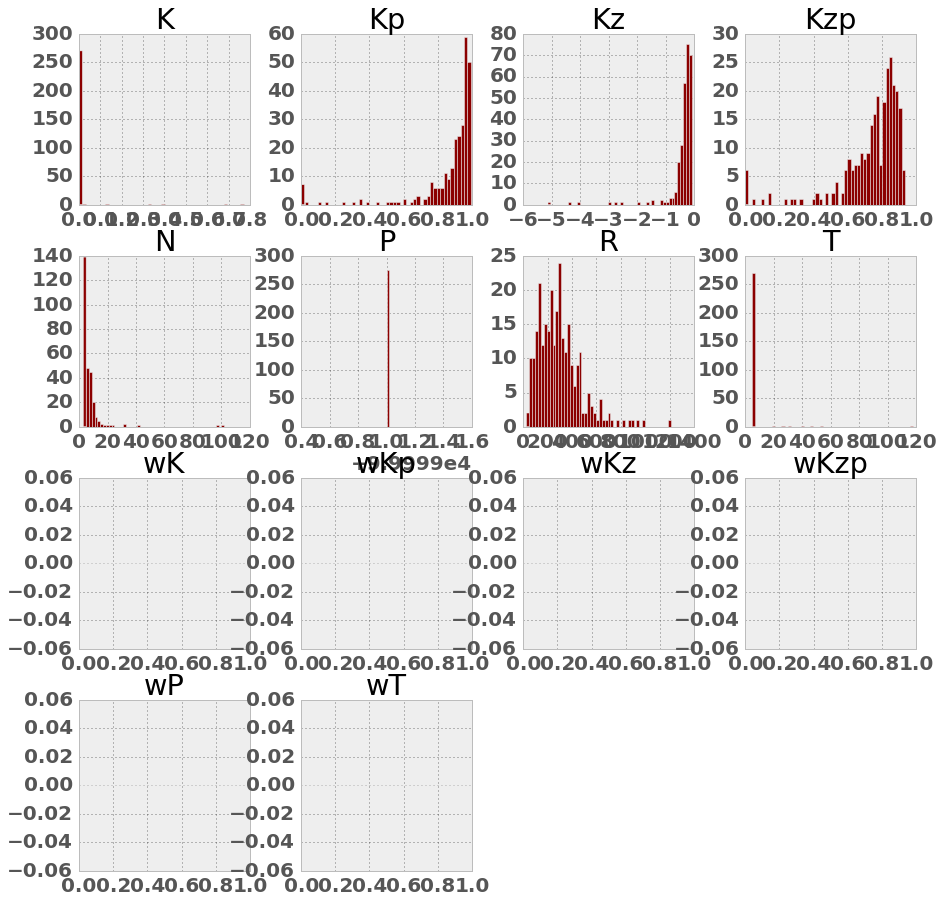

In [28]:
# Dispersed
df[df["Kz"]<0].hist(bins=50,figsize=(15,15),color="darkred")
plt.show()

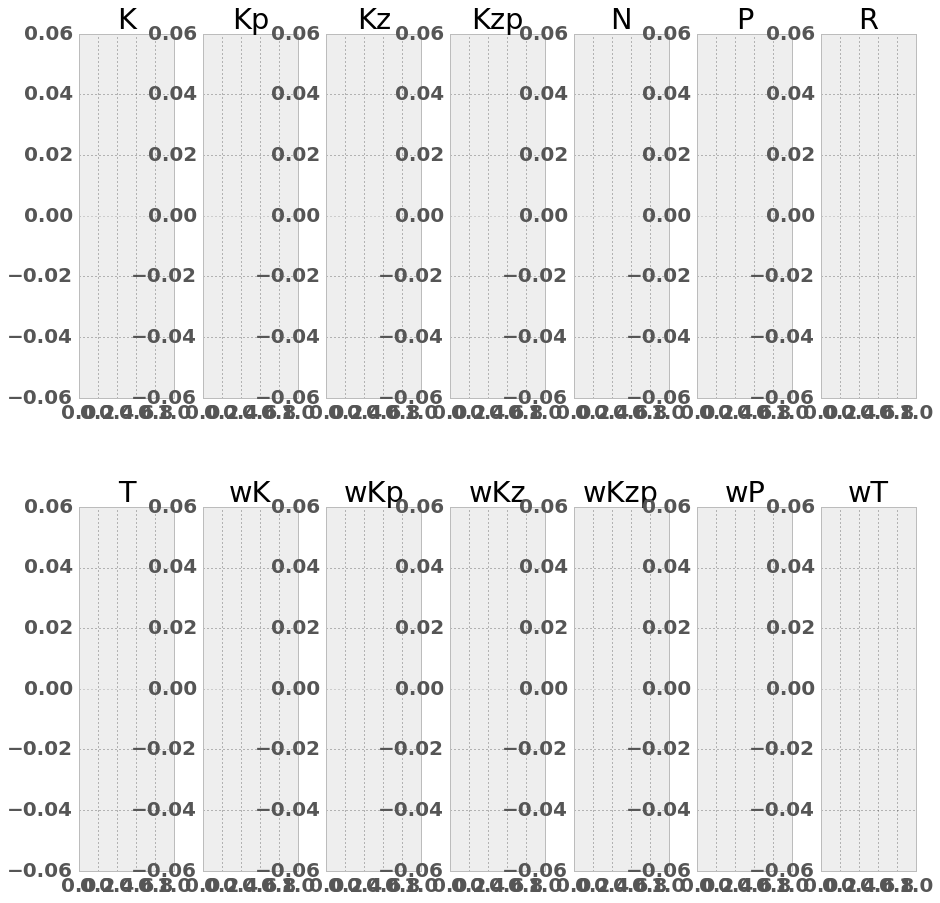

In [29]:
# Problems
df.ix[(df["wKzp"]>0.3165) & (df["wKzp"]<0.3185)].hist(bins=100,figsize=(15,15),color="darkred",layout=(2,7))
plt.show()

In [30]:
print "How many of my previous 11 top-scoring structures have completed the analysis?\n"
print df.ix[df["structid"].isin(["4BHW","2NPP","4NM6","4JSP","2OVQ","3ETO","3GT8","2RD0","2Y1M","2SHP","1RJB"]),["structid","chain","Kz","Kp","wKz","wKp"]]

How many of my previous 11 top-scoring structures have completed the analysis?

    structid chain       Kz       Kp  wKz  wKp
24      3ETO     B  -0.1676  0.97250  NaN  NaN
162     2SHP     B  12.7500  0.00001  NaN  NaN
176     2RD0     A  -0.2119  0.95640  NaN  NaN
274     2Y1M     F   7.6500  0.00001  NaN  NaN


In [31]:
lower = ["1d5r","2shp","2rd0","4mzr","2ovq","2ii5","2npp","3iz0","2lwi","1dc2"]
upper = [s.upper() for s in lower]
print "Them!"
print df.ix[df["structid"].isin(upper),["structid","chain","Kz","wKz","Kp","wKp"]]
print "Missing:",', '.join([s for s in upper if s not in df["structid"].values])


sigClustObs = (df["T"]>5)  & (df["Kz"]>0)  & (df["Kp"]<0.0001)
sigClustVal = (df["wT"]>5) & (df["wKz"]>0) & (df["wKp"]<0.0001)
sigDispObs  = (df["T"]>5)  & (df["Kz"]<0)  & (df["Kp"]<0.0001)
sigDispVal  = (df["wT"]>5) & (df["wKz"]<0) & (df["wKp"]<0.0001)

print "\nSignificantly clustered observations: %d"%sigClustObs.sum()
print df.ix[sigClustObs,["structid","chain","R","N","T","K","Kz","Kp","Kzp"]]

print "\nSignificantly clustered values: %d"%sigClustVal.sum()
print df.ix[sigClustVal,["structid","chain","R","N","wT","wK","wKz","wKp","wKzp"]]

print "\nSignificantly dispersed observations: %d"%sigDispObs.sum()
print df.ix[sigDispObs,["structid","chain","R","N","T","K","Kz","Kp","Kzp"]]

print "\nSignificantly dispersed values: %d"%sigDispVal.sum()
print df.ix[sigDispVal,["structid","chain","R","N","wT","wK","wKz","wKp","wKzp"]]

Them!
    structid chain       Kz  wKz       Kp  wKp
130     4MZR     B   4.6450  NaN  0.00012  NaN
151     1D5R     A   7.4340  NaN  0.00001  NaN
162     2SHP     B  12.7500  NaN  0.00001  NaN
176     2RD0     A  -0.2119  NaN  0.95640  NaN
285     2LWI     A   3.2640  NaN  0.00974  NaN
330     1DC2     A   3.2330  NaN  0.00304  NaN
Missing: 2OVQ, 2II5, 2NPP, 3IZ0

Significantly clustered observations: 16
    structid chain    R    N   T        K      Kz       Kp           Kzp
107     1NQ0     A  250   20  13  0.31050   5.727  0.00002  1.023000e-08
140     4BGQ     A  276   32  25  0.75810   5.085  0.00001  3.683000e-07
144     4MLE     A  446   73  21  0.37400   4.547  0.00008  5.447000e-06
149     2OKN     A  477    8  22  0.85710   5.840  0.00004  5.209000e-09
150     3II5     A  262   30  16  0.52180  10.600  0.00001  3.061000e-26
151     1D5R     A  307   41  22  0.60370   7.434  0.00001  1.057000e-13
157     3LCO     A  293   31  20  0.59140   6.562  0.00001  5.326000e-11
162    

KeyError: 'recp'

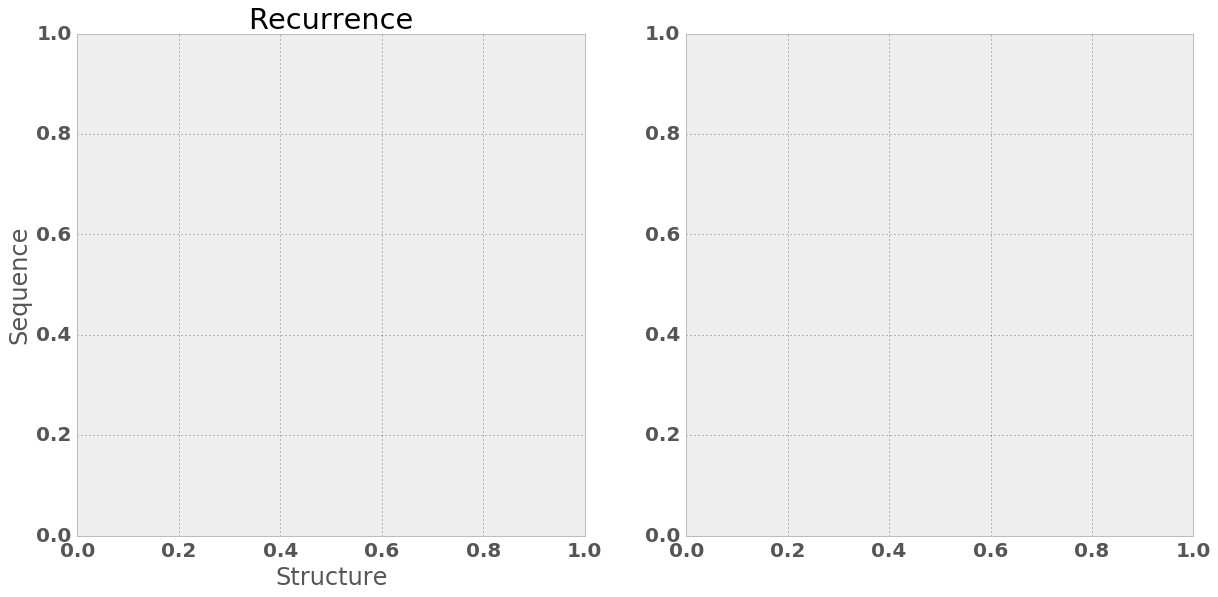

In [32]:
# Structure / Sequence Correlation
fig,ax = plt.subplots(1,2,figsize=(20,9))
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Structure")
ax[0].set_ylabel("Sequence")
ax[0].plot(-np.log10(df["recp"]),-np.log10(df["recsp"]),marker='o',linestyle='',alpha=0.7)
ax[0].set_xlim([0,5])
ax[0].set_ylim([0,5])
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Structure")
ax[1].set_ylabel("Sequence")
ax[1].plot(-np.log10(df["snpp"]),-np.log10(df["snpsp"]),marker='o',linestyle='',alpha=0.7)
ax[1].set_xlim([0,5])
ax[1].set_ylim([0,5])
fig.suptitle("log10-P-Value Correlation Plots",fontsize=25)
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,6))
fig.suptitle("Structural P-Values",fontsize=35)
ax[0].hist(df.ix[~df["recp"].isnull(),"recp"],bins=100)
ax[1].hist(df.ix[~df["snpp"].isnull(),"snpp"],bins=100)
plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,6))
fig.suptitle("Sequence P-Values",fontsize=35)
ax[0].hist(df.ix[~df["recsp"].isnull(),"recsp"],bins=100)
ax[1].hist(df.ix[~df["snpsp"].isnull(),"snpsp"],bins=100)
plt.tight_layout()
plt.show()

In [ ]:
def qqplot(pvec,ax=None,labels=None,color="darkblue",zoom=False):
    null = np.array([i*1./len(pvec) for i in range(1,len(pvec)+1)])
    pvec = np.sort(pvec)
    if zoom:
        null = null[null<0.05]
        pvec = pvec[null<0.05]
        if type(color)!=str:
            color = color[null<0.05]
        ax.plot([1,5.5],[1,5.5],color='grey',linestyle='-',linewidth=1)
    else:
        ax.plot([0,5.5],[0,5.5],color='grey',linestyle='-',linewidth=1)
    ax.set_xlim([0,5.5])
    ax.set_ylim([0,5.5])
    if type(color)==str:
        ax.plot(-np.log10(null),-np.log10(pvec),marker='o',linestyle='',alpha=0.7,c=color,markeredgewidth=0.0)
    else:
        ax.scatter(-np.log10(null),-np.log10(pvec),c=color,cmap="seismic")
    # Annotate the top 5 structures
    for i in range(5):
        label = tuple(labels[i])
        x,y   = -np.log10(null[i]),-np.log10(pvec[i])
        from random import randint
        ax.annotate("%s.%s"%label,xy=(x,y),textcoords="offset points",
                        ha="right",va="bottom",
                        xytext=(i*randint(-20,-10),(5-i)*randint(5,8)),
                        arrowprops=dict(facecolor="black",shrink=0.25))

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle("Structural P-Value QQ-Plots",fontsize=35)
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Expected")
ax[0].set_ylabel("Observed")
qqplot(df.sort("recp")["recp"].values,ax[0],df.sort("recp")[["sid","chain"]].values)
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Expected")
ax[1].set_ylabel("Observed")
qqplot(df.sort("snpp")["snpp"].values,ax[1],df.sort("snpp")[["sid","chain"]].values)
# plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle("Sequence P-Value QQ-Plots",fontsize=25)
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Expected")
ax[0].set_ylabel("Observed")
qqplot(df.sort("recsp")["recsp"].values,ax[0],df.sort("recsp")[["sid","chain"]].values)
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Expected")
ax[1].set_ylabel("Observed")
qqplot(df.sort("snpsp")["snpsp"].values,ax[1],df.sort("snpsp")[["sid","chain"]].values)
plt.subplots_adjust(left=0,bottom=0) # why is the necessary for this one plot?
plt.show()

In [ ]:
from qvalue import qvalue
snp_fdr  = sorted(qvalue.estimate(df["snpp"]))
rec_fdr  = sorted(qvalue.estimate(df["recp"]))
snps_fdr = sorted(qvalue.estimate(df["snpsp"]))
recs_fdr = sorted(qvalue.estimate(df["recsp"]))
tdf = pd.DataFrame([snp_fdr,rec_fdr,snps_fdr,recs_fdr]).transpose()
tdf.columns = ["snp_fdr","rec_fdr","snps_fdr","recs_fdr"]
tdf.index = df.index
df = tdf.merge(df,how='left',left_index=True,right_index=True)

print "\n####=====================================================####"
print "Structural P-Values passing q-value Correction at FDR<0.1"
print "Clustering:     %d"%(np.array(snp_fdr)<0.1).sum()
print "Recurrence:     %d"%(np.array(rec_fdr)<0.1).sum()
print "\n####=====================================================####"
print "Sequence P-Values passing q-value Correction at FDR<0.1"
print "Clustering:     %d"%(np.array(snps_fdr)<0.1).sum()
print "Recurrence:     %d"%(np.array(recs_fdr)<0.1).sum()

In [ ]:
# Output all scores, p-values, and q-values to file
with open("cosmic_clumps_results.txt",'wb') as fout:
    df.to_csv(fout,sep='\t')

In [ ]:
# Compare results with Kamburov et al
lower = ["1d5r","2shp","2rd0","4mzr","2ovq","2ii5","2npp","3iz0","2lwi","1dc2"]
upper = [s.upper() for s in lower]
print "\nStructures passing FDR of 0.1 in Kamburov et al with TCGA (%d):"%len(upper)
print ', '.join(upper)

print "\nStructures passing FDR of 0.1 for Cosmic (%d):"%(df["rec_fdr"]<0.1).sum()
print df.ix[df["rec_fdr"]<0.1,["sid","chain","recp","recsp","rec_fdr","recs_fdr"]]

print "\nP-values and FDR for all structures reported significant in Kamburov et al (%d):"%(df["sid"].isin(upper)).sum()
print df.ix[df["sid"].isin(upper),["sid","chain","recp","recsp","rec_fdr","recs_fdr"]]

In [ ]:
# SNPCLUST # Rank Correlation between nominally significant sequence- and structure-clustered structures
from scipy.stats import kendalltau,spearmanr
print "Focus: SNP Clustering"
print "Structures with nominally significant structural clustering: %d"%(df["snpp"] <0.001).sum()
print "Structures with nominally significant sequence   clustering: %d"%(df["snpsp"]<0.001).sum()
sig_str = [tuple(t) for t in df.ix[df["snpp"] <0.001,["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df.ix[df["snpsp"]<0.001,["sid","chain"]].values.tolist()]
print "\nOverlapping structures from both sets: %d"%len(set(sig_str).intersection(sig_seq))
sig_str = [tuple(t) for t in df[(df["snpp"]<0.001) & (df["snpsp"]<0.001)].sort( "snpp")[["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df[(df["snpp"]<0.001) & (df["snpsp"]<0.001)].sort("snpsp")[["sid","chain"]].values.tolist()]
print "\nSpearman Rank within the overlapping subset:   %g (p=%g)"%spearmanr( range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "Kendall's Tau within the overlapping subset:   %g (p=%g)"%kendalltau(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "\nSeq\t\tStruct"
for s1,s2 in zip(sig_seq,sig_str):
    print "%s.%s"%s1+"\t\t"+"%s.%s"%s2

In [ ]:
# DELTA DAF # Rank Correlation between nominally significant sequence- and structure-clustered structures
from scipy.stats import kendalltau,spearmanr
print "Focus: Recurrence"
print "Structures with nominally significant structural clustering: %d"%(df[ "recp"]<0.001).sum()
print "Structures with nominally significant sequence   clustering: %d"%(df["recsp"]<0.001).sum()
sig_str = [tuple(t) for t in df.ix[df[ "recp"]<0.001,["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df.ix[df["recsp"]<0.001,["sid","chain"]].values.tolist()]
print "\nOverlapping structures from both sets: %d"%len(set(sig_str).intersection(sig_seq))
sig_str = [tuple(t) for t in df[(df["recp"]<0.001) & (df["recsp"]<0.001)].sort( "recp")[["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df[(df["recp"]<0.001) & (df["recsp"]<0.001)].sort("recsp")[["sid","chain"]].values.tolist()]
print "\nSpearman Rank within the overlapping subset:   %g (p=%g)"%spearmanr(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "Kendall's Tau within the overlapping subset:   %g (p=%g)"%kendalltau(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "\nSeq\t\tStruct"
for s1,s2 in zip(sig_seq,sig_str):
    print "%s.%s"%s1+"\t\t"+"%s.%s"%s2